In [ ]:
pip install mne

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from GitHub and many other sources. To find out more about importing data, and how Colab can be used for data science, see the links below under <a href="#working-with-data">Working with data</a>.

In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
import os.path as op
import mne
from matplotlib import pyplot as plt


In [ ]:
data_path = op.join(mne.datasets.sample.data_path(), 'MEG',
                    'sample', 'sample_audvis_raw.fif')
raw =mne.io.read_raw_fif(data_path,preload = True)
raw.set_eeg_reference('average', projection=True)


Using default location ~/mne_data for sample...
Creating ~/mne_data


100%|██████████████████████████████████████| 1.65G/1.65G [00:00<00:00, 512GB/s]
Untarring contents of '/root/mne_data/MNE-sample-data-processed.tar.gz' to '/root/mne_data'


Attempting to create new mne-python configuration file:
/root/.mne/mne-python.json
Opening raw data file /root/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Reading 0 ... 166799  =      0.000 ...   277.714 secs...
EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.


<Raw | sample_audvis_raw.fif, 376 x 166800 (277.7 s), ~481.8 MB, data loaded>

In [ ]:
#Give me the sample rate 
print('The sample rate is', raw.info['sfreq'], 'Hz')
#Give me the size of the data matrx
print('The data matrix size is %s channels X %s samples' % (len(raw), len(raw.times)))

The sample rate is 600.614990234375 Hz
The data matrix size is 166800 channels X 166800 samples


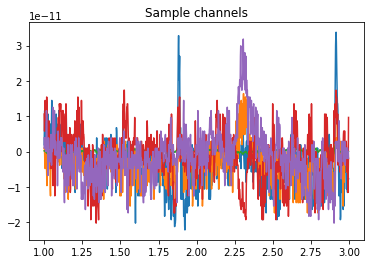

In [ ]:
# Extract data from the first 5 channels, from 1 s to 3 s.
sfreq = raw.info['sfreq']
data, times = raw[:5, int(sfreq * 1):int(sfreq * 3)]
_ = plt.plot(times, data.T)
_ = plt.title('Sample channels')

In [ ]:
#Pick certain channels in data

eeg_only = raw.copy().pick_types(meg=False, eeg=True) #only uses eeg channels
spec_chans = ['EEG 0123', 'MEG 0123']
specific_chans = raw.copy().pick_channels(spec_chans)
#Give me the size of the data matrx
print('The data matrix size is %s channels X %s samples' % (len(raw), len(raw.times)))
print('Data size of just specific data is %s channels X %s Samples' % (len(specific_chans), len(specific_chans.times)))

Removing projector <Projection | PCA-v1, active : False, n_channels : 102>
Removing projector <Projection | PCA-v2, active : False, n_channels : 102>
Removing projector <Projection | PCA-v3, active : False, n_channels : 102>
Removing projector <Projection | PCA-v1, active : False, n_channels : 102>
Removing projector <Projection | PCA-v2, active : False, n_channels : 102>
Removing projector <Projection | PCA-v3, active : False, n_channels : 102>
Removing projector <Projection | Average EEG reference, active : False, n_channels : 59>
The data matrix size is 166800 channels X 166800 samples
Data size of just EEG data is 166800 channels X 166800 Samples


In [ ]:

eeg_only = raw.copy().pick_types(meg=False, eeg=True)
print('The data matrix size is %s channels X %s samples' % (len(raw), len(raw.times)))
print(eeg_only)

Removing projector <Projection | PCA-v1, active : False, n_channels : 102>
Removing projector <Projection | PCA-v2, active : False, n_channels : 102>
Removing projector <Projection | PCA-v3, active : False, n_channels : 102>
The data matrix size is 166800 channels X 166800 samples
<Raw | sample_audvis_raw.fif, 59 x 166800 (277.7 s), ~78.0 MB, data loaded>


In [ ]:
#You can restrict the data to a specific time range

raw = raw.crop(0, 50)  # in seconds
print('New time range from', raw.times.min(), 's to', raw.times.max(), 's')

#And drop channels by name

nchan = raw.info['nchan']
raw = raw.drop_channels(['MEG 0241', 'EEG 001'])
print('Number of channels reduced from', nchan, 'to', raw.info['nchan'])

In [ ]:
# Create multiple Raw objects
raw1 = raw.copy().crop(0, 10)
raw2 = raw.copy().crop(10, 20)
raw3 = raw.copy().crop(20, 40)

# Concatenate in time (also works without preloading)
raw1.append([raw2, raw3])
print('Time extends from', raw1.times.min(), 's to', raw1.times.max(), 's')

Setting up low-pass filter at 40 Hz

IIR filter parameters
---------------------
Butterworth lowpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 8 (effective, after forward-backward)
- Cutoff at 40.00 Hz: -6.02 dB



/usr/local/lib/python3.8/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


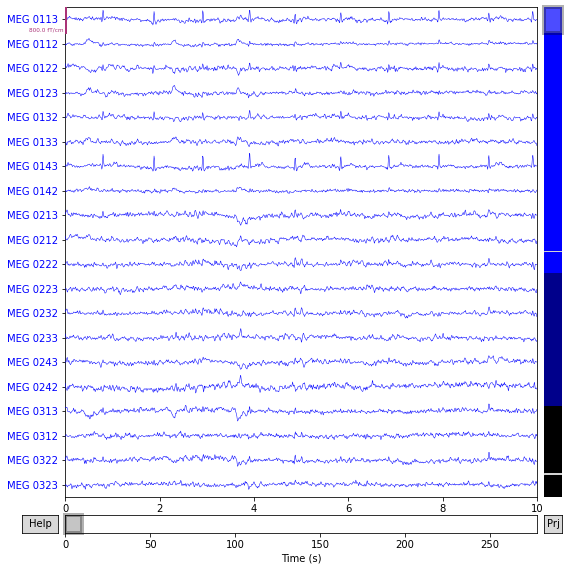

In [ ]:
#To visualise raw data
raw.plot(block=True, lowpass=40);